<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Fernanda Urrea, ROL: 201551522-0 </H3>
<H3 align='center'> Matías Gómez, ROL: 201460501-3 </H3>

<hr style="height:2px;border:none"/>

## 1. Calidad de un vino
---

Existen muchas variedades de vino existentes debido a los distintos gustos que tienen las personas. Del gusto se desprende la calidad que una persona le podría asignar a un vino, el cual proviene del gusto de la persona en particular, o bien, a la gran cantidad de quı́micos y procesos que se aplican a la producción de vino. Para el área de negocios, el estimar cuál es la calidad de un vino en base a la apreciación del público es una tarea bastante difı́cil.  
Para esta actividad se trabajará con dos *datasets* asociados a las variantes tinto y blanco del vino portugués
”Vinho Verde”[[1]](#refs). Debido a temas privados solo se cuenta con las caracterı́stcas fisioquı́micas asociadas a un
vino en particular, los cuales corresponden a 11 atributos numéricos descritos en el siguiente __[link](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names)__.

Este problema puede ser abordado como clasificación de 11 clases o de regresión, ya que el atributo a estimar,
*quality*, tiene un dominio como valor entero 0 y 10. La forma de resolverlo será a través de **ensamblados**.

<img src="https://uploads.toptal.io/blog/image/92064/toptal-blog-image-1454584112948-fc1d35939aa1886bf30c816b3ac20e21.jpg" title="Title text" width="20%"  />

#### a) Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si es vino tinto o blanco. Describa el dataset a trabajar.

In [7]:
import pandas as pd
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_white = pd.read_csv("winequality-white.csv",sep=";")

In [8]:
df_red['tipo'] = 1
df_white['tipo'] = 0

In [9]:
df = pd.concat([df_red,df_white], axis=0)

In [12]:
print(df['tipo'].value_counts())

0    4898
1    1599
Name: tipo, dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
tipo                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


El dataset presenta variables de input de tipo int basadas en caracteristicas fisioquimicas de las pruebas hechas en cada vino y se detallan a continuación:  
   1 - fixed acidity  
   2 - volatile acidity  
   3 - citric acid  
   4 - residual sugar  
   5 - chlorides  
   6 - free sulfur dioxide  
   7 - total sulfur dioxide  
   8 - density  
   9 - pH  
   10 - sulphates  
   11 - alcohol  
   12 - quality (score between 0 and 10)  
   13 - tipo  


#### b) Aborde este problema como si fuera de clasificación con multiples clases para predecir el valor de calidad de un vino, es decir, utilice las distintas caracterı́sticas fisioquı́micas presentes en los datos para estimar la etiqueta ¿Cuántas clases son y cuántos ejemplos hay por clase? ¿Qué sucede con predecir si un vino tiene calidad mínima (0) o máxima(10)? Además para el propósito académico de esta actividad cree un conjunto de pruebas (20%)  para evaluar la generalización final del modelo y otro de validación (20%) si estima conveniente. 

In [19]:
y = df["quality"].values #or codify
print(df['quality'].value_counts())

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


<table>
    <tr>
        <td>
\begin{eqnarray}
&{\textbf{Calidad}}\\ & 3 \\ & 4\\ & 5\\ & 6\\ & 7\\ & 8\\ & 9\\
\end{eqnarray}
        </td>
        <td>
\begin{eqnarray}
&{\textbf{Cantidad de ejemplos}}\\& 30 \\ & 216\\ & 2138\\ & 2836\\ & 1079\\ & 193\\ & 5\\
\end{eqnarray}
        </td>


    </tr>
</table>

De las 11 calidades posibles, solo hay 7 presentes en el dataset (3 a 9).  
Como en el dataset no hay vinos de calidad mínima no máxima, cualquier modelo de aprendizaje que se implemente no calsificará a un vino con calidad mínima (0) o máxima (10).  

In [21]:
df.drop("quality",axis=1,inplace=True)
X = df.values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [27]:
print("Conjunto de entrenamiento: ", X_train.shape)
print("Conjunto de pruebas: ", X_test.shape)
print("Conjunto de validacion: ", X_val.shape)

Conjunto de entrenamiento:  (3897, 12)
Conjunto de pruebas:  (1300, 12)
Conjunto de validacion:  (1300, 12)


In [31]:
print(X_train[0],"\n\n",X_test[0],"\n\n",X_val[0])

[6.7000e+00 3.5000e-01 4.8000e-01 8.8000e+00 5.6000e-02 3.5000e+01
 1.6700e+02 9.9628e-01 3.0400e+00 4.7000e-01 9.4000e+00 0.0000e+00] 

 [7.600e+00 3.200e-01 5.800e-01 1.675e+01 5.000e-02 4.300e+01 1.630e+02
 9.999e-01 3.150e+00 5.400e-01 9.200e+00 0.000e+00] 

 [6.000e+00 2.600e-01 5.000e-01 2.200e+00 4.800e-02 5.900e+01 1.530e+02
 9.928e-01 3.080e+00 6.100e-01 9.800e+00 0.000e+00]


#### c) Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Defina un Árbol **no regularizado** (como el que no tiene límites en su profundidad) y otro Árbol **regularizado** (variando los hiper-parámetros que prefiera, por ejemplo, los más comunes como la profundidad, el número mínimo de datos para realizar *split* o el número mínimo de datos en cada hoja), recuerde que las **decisiones** no pueden ser basadas mirando el conjunto de pruebas. Debido al desbalanceo que se produce en las clases mida la métrica F1-score [[2]](#refs) sobre el conjunto de entrenamiento y de pruebas.


In [109]:
from sklearn.metrics import f1_score
import numpy as np

La métrica F1-score puede ser interpretada como un promedio ponderado de la precisión y la exhaustividad, el mejor valor de la métrica es 1 y el peor valor es 0.  Además, la contribución relativa de la precisión y la exhaustividad a la métrica F1 score es la misma.  

In [113]:
from sklearn.tree import DecisionTreeClassifier as Tree
model= Tree()
model.fit(X_train,y_train)#Árbol no regularizado
print("Train Accuracy: ",model.score(X_train,y_train))
print("Val Accuracy: ",model.score(X_val,y_val))
print("Test Accuracy: ",model.score(X_test,y_test))
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train Accuracy:  1.0
Val Accuracy:  0.5776923076923077
Test Accuracy:  0.5715384615384616
Train F1-score:  1.0
Val F1-score:  0.5747509671871751
Test F1-score:  0.5692627469800011


Se creó el árbol de clasificación no regularizado, y se midió la accuracy y el f1-score, mostrando un claro ejemplo de overfitting, pues el error en el conjunto de entrenamiento es nulo.  

Ahora, se crea un arbol regularizado, imponiendo una máxima altura de 12 niveles y una mínima cantidad de 10 ejemplos en cada hoja.  

In [156]:
model= Tree()
model.set_params(max_depth=12, criterion='gini',splitter='best',min_samples_leaf=10)
model.fit(X_train,y_train)#Árbol regularizado
print("Train Accuracy: ",model.score(X_train,y_train))
print("Val Accuracy: ",model.score(X_val,y_val))
print("Test Accuracy: ",model.score(X_test,y_test))
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train Accuracy:  0.6966897613548884
Val Accuracy:  0.5146153846153846
Test Accuracy:  0.5576923076923077
Train F1-score:  0.6871997175378916
Val F1-score:  0.5050240525353648
Test F1-score:  0.5482925165754408


#### d) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **Bagging**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en c)*) ¿Qué debería suceder? ¿Se visualiza *overfitting*? Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.

In [118]:
from sklearn.ensemble import BaggingClassifier

Veamos primero el árbol no regularizado, para los casos n = 1, 2, 3, 4.  

In [272]:
model = BaggingClassifier(base_estimator=Tree(), n_estimators=1, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  0.8285382913777093
Val F1-score:  0.5302575530267837
Test F1-score:  0.5156827617826207


In [120]:
model = BaggingClassifier(base_estimator=Tree(), n_estimators=2, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train Accuracy:  0.8343148846081402
Val Accuracy:  0.513896541032835
Test Accuracy:  0.518489154066509


In [271]:
model = BaggingClassifier(base_estimator=Tree(), n_estimators=3, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  0.9124441826291637
Val F1-score:  0.5582512888792391
Test F1-score:  0.5519469636647171


In [270]:
model = BaggingClassifier(base_estimator=Tree(), n_estimators=4, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  0.9247304658795948
Val F1-score:  0.5806378888980404
Test F1-score:  0.5555576410134777


Ahora, se graficará el F1-score en función del parámetro n, para los distintos conjuntos.  

In [142]:
list_Train=[];
list_Val=[];
list_Test=[];
for i in range(10):
    model = BaggingClassifier(base_estimator=Tree(), n_estimators=i+1, n_jobs=-1)
    model.fit(X_train,y_train)
    list_Train.append(f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))));
    list_Val.append(f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))));
    list_Test.append(f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))));

In [127]:
import matplotlib.pyplot as plt

In [138]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

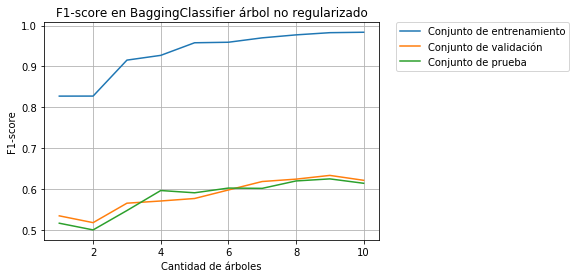

In [162]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4,5,6,7,8,9,10],list_Train, label="Conjunto de entrenamiento");
ax.plot([1,2,3,4,5,6,7,8,9,10],list_Val, label="Conjunto de validación");
ax.plot([1,2,3,4,5,6,7,8,9,10],list_Test, label="Conjunto de prueba");

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set(xlabel='Cantidad de árboles', ylabel='F1-score',
       title='F1-score en BaggingClassifier árbol no regularizado')
ax.grid()
plt.show()

Ahora replicaremos el proceso anterior para el árbol regularizado. Veremos los casos correspondientes a n = 1, 2, 3, 4

In [269]:
model = BaggingClassifier(base_estimator=Tree(max_depth=12, criterion='gini',splitter='best',min_samples_leaf=10), n_estimators=1, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  0.6203486005391072
Val F1-score:  0.4901310087532866
Test F1-score:  0.5014312039213853


In [268]:
model = BaggingClassifier(base_estimator=Tree(max_depth=12, criterion='gini',splitter='best',min_samples_leaf=10), n_estimators=2, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  0.6766676743743142
Val F1-score:  0.5568013851934626
Test F1-score:  0.5521797078568939


In [267]:
model = BaggingClassifier(base_estimator=Tree(max_depth=12, criterion='gini',splitter='best',min_samples_leaf=10), n_estimators=3, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  0.6792979995112494
Val F1-score:  0.5388462103693319
Test F1-score:  0.5562065055904958


In [266]:
model = BaggingClassifier(base_estimator=Tree(max_depth=12, criterion='gini',splitter='best',min_samples_leaf=10), n_estimators=4, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  0.6926704794895909
Val F1-score:  0.537232415629999
Test F1-score:  0.5820834849144804


Se procede a graficar el F1-score en función del parámetro n, para los distintos conjuntos en el árbol regularizado.  

In [161]:
list_Train1=[];
list_Val1=[];
list_Test1=[];
for i in range(10):
    model = BaggingClassifier(base_estimator=Tree(max_depth=12, criterion='gini',splitter='best',min_samples_leaf=10), n_estimators=i+1, n_jobs=-1)
    model.fit(X_train,y_train)
    list_Train1.append(f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))));
    list_Val1.append(f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))));
    list_Test1.append(f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))));

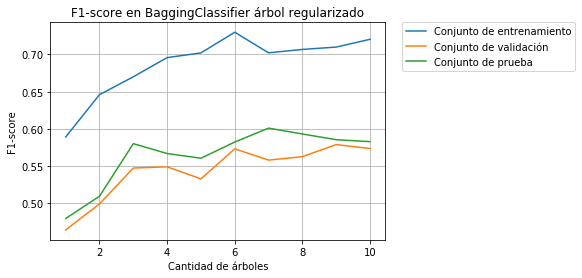

In [163]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4,5,6,7,8,9,10],list_Train1, label="Conjunto de entrenamiento");
ax.plot([1,2,3,4,5,6,7,8,9,10],list_Val1, label="Conjunto de validación");
ax.plot([1,2,3,4,5,6,7,8,9,10],list_Test1, label="Conjunto de prueba");

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set(xlabel='Cantidad de árboles', ylabel='F1-score',
       title='F1-score en BaggingClassifier árbol regularizado')
ax.grid()
plt.show()

En conclusión, como era de esperarse, el árbol no regularizado inicialmente (n=1), bajó el overfitting, sin embargo a medida que aumenta la cantidad de árboles, el F1-score tiene una tendencia al alza llegado a ser cercano a 1, y por ende, el modelo tiende a overfitting.  
En el caso del árbol regularizado, se observa una tendencia similar. Sin embargo, como el árbol regularizado tiene una accuracy más baja en todos los conjuntos, este comportamiento es el mismo pero para valores de F1-score más bajos, por lo que quizas se presente overfitting para casos con n mayor a 10 si se sigue la tendencia.  

#### e) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **AdaBoost**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en c)* ¿Se visualiza *overfitting*? ¿Qué técnica se utiliza, *re-muestrear* o *pesar* ejemplos? ¿Qué le parece más sensato?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

AdaBoost utiliza la técnica de pesar ejemplos.  
Cuando se pesan los ejemplos, se guia el modelo a un mejor aprendizaje, sin embargo en el caso de que exista overfitting, éste no se verá reducido.  De ahí que lo más sensato deberia ser tomado en cuenta el modelo, si vamos a utilizar muchos árboles correlacionados, Bagging no será útil para valores de n grandes; y si se va a utilizar un árbol que presenta overfitting, AdaBoost no será útil.  

In [164]:
from sklearn.ensemble import AdaBoostClassifier

Primero veamos el árbol no regularizado.  

In [265]:
model = AdaBoostClassifier(base_estimator=Tree(), n_estimators=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  1.0
Val F1-score:  0.590813158312142
Test F1-score:  0.5694585470217831


In [264]:
model = AdaBoostClassifier(base_estimator=Tree(), n_estimators=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  1.0
Val F1-score:  0.5866460803961298
Test F1-score:  0.5678351703283526


In [263]:
model = AdaBoostClassifier(base_estimator=Tree(), n_estimators=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  1.0
Val F1-score:  0.5798339587453166
Test F1-score:  0.5662059518152837


Ahora se realizará un gráfico del f1-score en función de la cantidad de árboles.  

In [172]:
list_Train=[];
list_Val=[];
list_Test=[];
for i in range(10):
    model = AdaBoostClassifier(base_estimator=Tree(), n_estimators=i+1)
    model.fit(X_train,y_train)
    list_Train.append(f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))));
    list_Val.append(f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))));
    list_Test.append(f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))));

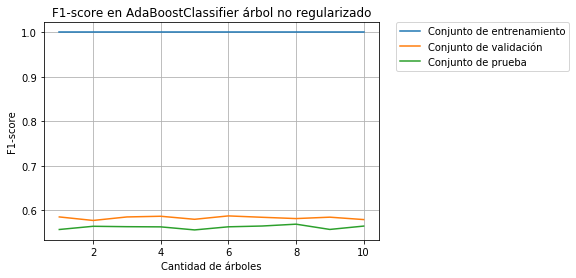

In [182]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4,5,6,7,8,9,10],list_Train, label="Conjunto de entrenamiento");
ax.plot([1,2,3,4,5,6,7,8,9,10],list_Val, label="Conjunto de validación");
ax.plot([1,2,3,4,5,6,7,8,9,10],list_Test, label="Conjunto de prueba");

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set(xlabel='Cantidad de árboles', ylabel='F1-score',
       title='F1-score en AdaBoostClassifier árbol no regularizado')
ax.grid()
plt.show()

Evidenciamos que adaboost no reduce en nada el overfitting del árbol regularizado.  

Veremos que pasa en el caso del árbol regularizado.   

In [262]:
model = AdaBoostClassifier(base_estimator=Tree(max_depth=12, criterion='gini',splitter='best',min_samples_leaf=10), n_estimators=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  0.6872012838552163
Val F1-score:  0.5050490824236809
Test F1-score:  0.5467843491842679


In [261]:
model = AdaBoostClassifier(base_estimator=Tree(max_depth=12, criterion='gini',splitter='best',min_samples_leaf=10), n_estimators=2)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  0.66110854523357
Val F1-score:  0.4819214567351946
Test F1-score:  0.5083289797146152


In [260]:
model = AdaBoostClassifier(base_estimator=Tree(max_depth=12, criterion='gini',splitter='best',min_samples_leaf=10), n_estimators=3)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  0.7006956891980785
Val F1-score:  0.5218035019966539
Test F1-score:  0.5302659061775171


Veremos como se porta el F1-score en función de la cantidad de árboles.  

In [180]:
list_Train1=[];
list_Val1=[];
list_Test1=[];
for i in range(10):
    model = AdaBoostClassifier(base_estimator=Tree(max_depth=12, criterion='gini',splitter='best',min_samples_leaf=10), n_estimators=i+1)
    model.fit(X_train,y_train)
    list_Train1.append(f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))));
    list_Val1.append(f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))));
    list_Test1.append(f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))));

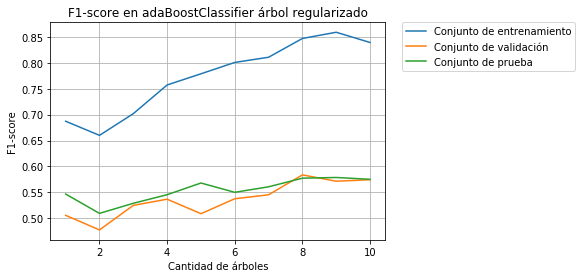

In [181]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4,5,6,7,8,9,10],list_Train1, label="Conjunto de entrenamiento");
ax.plot([1,2,3,4,5,6,7,8,9,10],list_Val1, label="Conjunto de validación");
ax.plot([1,2,3,4,5,6,7,8,9,10],list_Test1, label="Conjunto de prueba");

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set(xlabel='Cantidad de árboles', ylabel='F1-score',
       title='F1-score en adaBoostClassifier árbol regularizado')
ax.grid()
plt.show()

A diferencia del árbol no regularizado en el que se ve overfitting desde el inicio, aqui se observa que hay una tendencia al overfitting, pero el f1-score varia dependiendo de la cantidad de árboles.  

#### f) Pruebe otra técnica de ensamblado dedicada a árboles de decisión, que combina el muestreo *boostrap* de *Bagging* con muestreo sobre las *features*: **Random Forest**, compare el Árbol **no regularizado** con el **regularizado** ¿Se visualiza *overfitting*?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen el F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.

In [183]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=, max_depth=,n_jobs=-1)

In [259]:
model = RandomForestClassifier(n_estimators=1, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  0.8168030180810374
Val F1-score:  0.5249584665234487
Test F1-score:  0.5172006781654928


In [258]:
model = RandomForestClassifier(n_estimators=2, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  0.8117341424381154
Val F1-score:  0.5040859119337802
Test F1-score:  0.5051460060487156


In [257]:
model = RandomForestClassifier(n_estimators=3, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  0.9124016904308668
Val F1-score:  0.5400089441225484
Test F1-score:  0.5364962042842699


Al igual que en las partes anteriores, se procede a realizar el gráfico del F1-score.  

In [188]:
list_Train=[];
list_Val=[];
list_Test=[];
for i in range(10):
    model = RandomForestClassifier(n_estimators=i+1, n_jobs=-1)
    model.fit(X_train,y_train)
    list_Train.append(f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))));
    list_Val.append(f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))));
    list_Test.append(f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))));

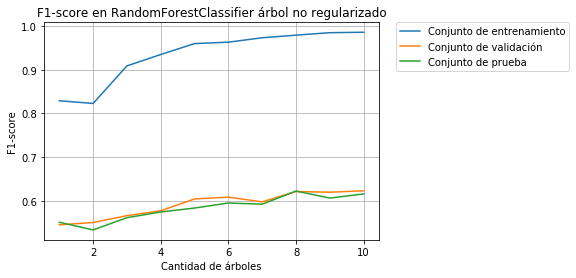

In [190]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4,5,6,7,8,9,10],list_Train, label="Conjunto de entrenamiento");
ax.plot([1,2,3,4,5,6,7,8,9,10],list_Val, label="Conjunto de validación");
ax.plot([1,2,3,4,5,6,7,8,9,10],list_Test, label="Conjunto de prueba");

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set(xlabel='Cantidad de árboles', ylabel='F1-score',
       title='F1-score en RandomForestClassifier árbol no regularizado')
ax.grid()
plt.show()

Ahora veremos el árbol regularizado.  

In [256]:
model = RandomForestClassifier(max_depth=12, criterion='gini',min_samples_leaf=10, n_estimators=1, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  0.5970744602887358
Val F1-score:  0.4823494269289788
Test F1-score:  0.475901730446425


In [255]:
model = RandomForestClassifier(max_depth=12, criterion='gini',min_samples_leaf=10, n_estimators=2, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  0.6245066608539938
Val F1-score:  0.5148861521575482
Test F1-score:  0.5185584795011361


In [254]:
model = RandomForestClassifier(max_depth=12, criterion='gini',min_samples_leaf=10, n_estimators=3, n_jobs=-1)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  0.6474815177490163
Val F1-score:  0.5030852788229446
Test F1-score:  0.5683189047976107


In [195]:
list_Train1=[];
list_Val1=[];
list_Test1=[];
for i in range(10):
    model = RandomForestClassifier(max_depth=12, criterion='gini',min_samples_leaf=10, n_estimators=i+1)
    model.fit(X_train,y_train)
    list_Train1.append(f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))));
    list_Val1.append(f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))));
    list_Test1.append(f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))));

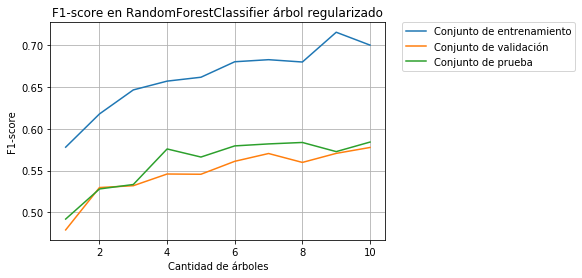

In [196]:
fig, ax = plt.subplots()
ax.plot([1,2,3,4,5,6,7,8,9,10],list_Train1, label="Conjunto de entrenamiento");
ax.plot([1,2,3,4,5,6,7,8,9,10],list_Val1, label="Conjunto de validación");
ax.plot([1,2,3,4,5,6,7,8,9,10],list_Test1, label="Conjunto de prueba");

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set(xlabel='Cantidad de árboles', ylabel='F1-score',
       title='F1-score en RandomForestClassifier árbol regularizado')
ax.grid()
plt.show()

En el árbol no regularizado se observa una clara tendencia a overfitting, sin embargo, el F1-score del árbol regularizado parece estabilizarse en un cercano a 0.7.  

#### g) Verifique que el **OOB error** (*out of bag error*) de los ensambladores que utilizan la técnica *boostrap* puede ser una alternativa como métrica de generalización, compárelo con el error calculado sobre el conjunto de pruebas y validación (o en su defecto *cross validation*).

Los ensambladores previos que utilizan boosting son Bagging y Random Forest.  
Por simplicidad, estudiaremos 4 casos, de ensamblajes de 25 árboles correspondientes a:

$\textbf{Caso 1:}$ Bagging de árbol no regularizado.  
$\textbf{Caso 2:}$ Bagging de árbol regularizado.  
$\textbf{Caso 3:}$ Random Forest de árbol no regularizado.  
$\textbf{Caso 4:}$ Random Forest de árbol regularizado.  

In [253]:
model = BaggingClassifier(base_estimator=Tree(), n_estimators=25, n_jobs=-1, warm_start=False, oob_score=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))
oob_error = 1 - model.oob_score_
test_error = 1 - model.score(X_test,y_test)
val_error = 1 - model.score(X_val,y_val)
print("OOB error: " ,oob_error)
print ("Val error: " ,val_error)
print("Test error: " ,test_error)

Train F1-score:  0.9984603534988651
Val F1-score:  0.6346565663429762
Test F1-score:  0.6308554980242141
OOB error:  0.3813189633051065
Val error:  0.35923076923076924
Test error:  0.36


In [252]:
model = BaggingClassifier(base_estimator=Tree(max_depth=12, criterion='gini',splitter='best',min_samples_leaf=10), n_estimators=25, n_jobs=-1, warm_start=False, oob_score=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))
oob_error = 1 - model.oob_score_
test_error = 1 - model.score(X_test,y_test)
val_error = 1 - model.score(X_val,y_val)
print("OOB error: " ,oob_error)
print ("Val error: " ,val_error)
print("Test error: " ,test_error)

C:\Users\Matu\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Matu\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


Train F1-score:  0.730985444877924
Val F1-score:  0.5891674331650314
Test F1-score:  0.5882585342411204
OOB error:  0.41159866564023606
Val error:  0.4061538461538462
Test error:  0.38923076923076927


In [251]:
model = RandomForestClassifier(n_estimators=25, n_jobs=-1, warm_start=True, oob_score=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))
oob_error = 1 - model.oob_score_
test_error = 1 - model.score(X_test,y_test)
val_error = 1 - model.score(X_val,y_val)
print("OOB error: " ,oob_error)
print ("Val error: " ,val_error)
print("Test error: " ,test_error)

Train F1-score:  0.9989733695631414
Val F1-score:  0.6563833875948151
Test F1-score:  0.6375827103394303
OOB error:  0.36977161919425194
Val error:  0.3384615384615385
Test error:  0.35307692307692307


In [250]:
model = RandomForestClassifier(max_depth=12, criterion='gini',min_samples_leaf=10, n_estimators=25, n_jobs=-1,  warm_start=True, oob_score=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))
oob_error = 1 - model.oob_score_
test_error = 1 - model.score(X_test,y_test)
val_error = 1 - model.score(X_val,y_val)
print("OOB error: " ,oob_error)
print ("Val error: " ,val_error)
print("Test error: " ,test_error)

Train F1-score:  0.7225950743442073
Val F1-score:  0.5788790078958282
Test F1-score:  0.6030336878534772
OOB error:  0.41416474210931487
Val error:  0.41538461538461535
Test error:  0.39692307692307693


En los cuatro casos presentados, notamos que el OOB error es bastante cercano al error que se usa tradicionalmente. Por ende, concluimos que OOB error sí es significativo.  

#### h) Entrene alguna otra máquina de aprendizaje, elegida por usted de entre todas las vistas en el curso, para resolver el problema. Elija los hiper-parámetros que estime convenientes intentando aumentar el *F1-scor*e obtenido por los algoritmos anteriores ¿Se logra una mejora? ¿Por qué?

Como abordamos este problema como un problema de clasificación multiclase, estimamos que es un problema muy similar al realizado en la pregunta 4 de la tarea anterior. Por esto, la máquina de aprendizaje que utilizaremos será una red neuronal con los mismos parámetros de dicha pregunta. Se espera que no existan mejoras significativas, ya que este problema no es un problema puro de multiclases ni puramente de regresión, ya que las clases poseen un orden jerárquico y toman valores discretos.  

Para utilizar la red neuronal, se requiere de la representación adecuada.  

In [228]:
Y_train_codif=[];
Y_test_codif=[];
Y_val_codif=[];
for i in range(3897):
    Y_train_codif.append(int(int(y_train[i])-3));
    if i<1300:
        Y_test_codif.append(int(int(y_test[i])-3));
        Y_val_codif.append(int(int(y_val[i])-3));
Y_train_codif=np.asarray(Y_train_codif);
Y_test_codif=np.asarray(Y_test_codif);
Y_val_codif=np.asarray(Y_val_codif);

In [229]:
print(Y_train_codif.shape,Y_test_codif.shape,Y_val_codif.shape)

(3897,) (1300,) (1300,)


In [233]:
import keras
y_onehot_train = keras.utils.to_categorical(Y_train_codif,num_classes=7)
y_onehot_test = keras.utils.to_categorical(Y_test_codif,num_classes=7)
y_onehot_val = keras.utils.to_categorical(Y_val_codif,num_classes=7)

C:\Users\Matu\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [240]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)
X_val_scaled = std.transform(X_val)

In [241]:
import time
start_time =time.time()
    
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(y_onehot_train.shape[1], activation="softmax"))
model.compile(optimizer="Adam", loss="categorical_crossentropy")
model.fit(X_train_scaled, y_onehot_train, epochs=40, batch_size=128, verbose=1)

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/40
3897/3897 [==============================] - 1s 140us/step - loss: 1.3517
Epoch 2/40
3897/3897 [==============================] - 0s 29us/step - loss: 1.1101
Epoch 3/40
3897/3897 [==============================] - 0s 39us/step - loss: 1.0642
Epoch 4/40
3897/3897 [==============================] - 0s 38us/step - loss: 1.0443
Epoch 5/40
3897/3897 [==============================] - 0s 33us/step - loss: 1.0204
Epoch 6/40
3897/3897 [==============================] - 0s 38us/step - loss: 1.0160
Epoch 7/40
3897/3897 [==============================] - 0s 37us/step - loss: 1.0027
Epoch 8/40
3897/3897 [==============================] - 0s 39us/step - loss: 0.9868
Epoch 9/40
3897/3897 [==============================] - 0s 33us/step - loss: 0.9747
Epoch 10/40
3897/3897 [==============================] - 0s 41us/step - loss: 0.9703
Epoch 11/40
3897/3897 [==============================] - 0s 44us/step - loss: 0.9637
Epoch 12/40
3897/3897 [==============================] - 0s 37us/step - l

Ahora necesitamos volver a la representación original para poder interpretar los datos.  

In [242]:
y_pred_train_nn=model.predict(X_train_scaled);
y_pred_test_nn=model.predict(X_test_scaled);
y_pred_val_nn=model.predict(X_val_scaled);

In [245]:
def f(x):
    if x==0:
        return 3;
    elif x==1:
        return 4;
    elif x==2:
        return 5;
    elif x==3:
        return 6;
    elif x==4:
        return 7;
    elif x==5:
        return 8;
    elif x==6:
        return 9;


y_pred_train_nn_etiquetas=[];
y_pred_test_nn_etiquetas=[];
y_pred_val_nn_etiquetas=[];
for i in range(3897):
    posMax=6;
    valMax=y_pred_train_nn[i][6]
    for j in range(6):
        if y_pred_train_nn[i][j] > valMax:
            valMax=y_pred_train_nn[i][j];
            posMax=j;
    y_pred_train_nn_etiquetas.append(f(posMax));
    if i < 1300:
        posMax=6;
        valMax=y_pred_test_nn[i][6]
        for j in range(6):
            if y_pred_test_nn[i][j] > valMax:
                valMax=y_pred_test_nn[i][j];
                posMax=j;
        y_pred_test_nn_etiquetas.append(f(posMax)); 
        
        posMax=6;
        valMax=y_pred_val_nn[i][6]
        for j in range(6):
            if y_pred_val_nn[i][j] > valMax:
                valMax=y_pred_val_nn[i][j];
                posMax=j;
        y_pred_val_nn_etiquetas.append(f(posMax));   
        
y_pred_train_nn_etiquetas=np.asarray(y_pred_train_nn_etiquetas);
y_pred_test_nn_etiquetas=np.asarray(y_pred_test_nn_etiquetas);
y_pred_val_nn_etiquetas=np.asarray(y_pred_val_nn_etiquetas);

In [249]:
print("Train F1-Score: ",f1_score(y_train,y_pred_train_nn_etiquetas, average='weighted',  labels=np.unique(y_pred_train_nn_etiquetas)))
print("Val F1-Score: ",f1_score(y_val,y_pred_val_nn_etiquetas, average='weighted', labels=np.unique(y_pred_val_nn_etiquetas)))
print("Test F1-Score: ", f1_score(y_test, y_pred_test_nn_etiquetas, average='weighted',labels=np.unique(y_pred_test_nn_etiquetas)))

Train F1-Score:  0.6703480022537507
Val F1-Score:  0.5366631251606007
Test F1-Score:  0.5617551343264141


Al calcular el valor de F1-score para los distintos conjuntos, notamos que son valores muy parecidos a los de los métodos anteriores que consideran ensablaje por Bagging, AdaBoost y RandomForest. Por lo que la solución entregada no aporta una mejora significativa. Como se esperaba según lo comentado al inicio.  

#### i) Compare y analice las distintas maneras con las que se resolvió el problema definido en b), por ejemplo incluya las decisiones que conlleva y los resultados que reflejan.

El problema se abordó como uno de clasificación, y se resolvió mediante el uso de árboles de clasicficación (regularizados y no regularizados) y distintos métodos de ensamblaje como Bagging, AdaBoost y RandomForest; además de la red nueronal implementada en la parte inmediatamente anterior.  

Para ver la eficacia o que tan bien se resolvió el problema, nos fijaremos en la medida de la F1-score en el conjunto de validación.  

El modelo que obtuvo mejor F1-score en el conjunto de validación fue AdaBoost con un árbol no regularizado (alrededor de 0,58) y el segundo mejor modelo fue la red neuronal con un F1-score de 0,5366.  

El primer resultado parece curioso puesto que se observa un buen rendimiento pese al overfitting, aún así, no es lo suficientemente bueno como para señalar que es una solución satisfactoria al problema.  




#### j) Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo *Bagging* realiza el voto de la mayoría para clasificación y promedio para regresión, *AdaBoost* realiza una combinación ponderada de cada clasificador dependiendo de su *habilidad* (desempeño para clasificar el conjunto de entrenamiento).

Basado en la idea de algoritmos genéticos, combinaremos predicciones tomando al mejor predictor, al peor, y predictores al azar.

In [273]:
from sklearn.tree import DecisionTreeClassifier as Tree

Definimos una lista de 12 modelos distintos.  

In [276]:
lista_modelos=[Tree(), Tree(max_depth=1),  Tree(max_depth=2), Tree(max_depth=4), Tree(max_depth=8), Tree(max_depth=16), Tree(min_samples_leaf=3),  Tree(min_samples_leaf=5), Tree(min_samples_leaf=10),  Tree(max_depth=4, min_samples_leaf=10), Tree(max_depth=4, min_samples_leaf=5), Tree(max_depth=8, min_samples_leaf=10) ]
print(len(lista_modelos))

12


Se define una función que entrega los índices de la lista de los modelos con peor y mejor rendimiento en el conjunto de validación, basado en la f1-score.

In [277]:
def mejor_peor_rendimiento(lista_de_modelos):
    i=0;
    i_max=0;
    i_min=0;
    score_actual=0;
    score_min=1;
    score_max=0;

    for model in lista_de_modelos:
        model.fit(X_train,y_train);
        score_actual=f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val)));
        if score_actual>score_max:
            score_max=score_actual;
            i_max=i;
        if score_actual<score_min:
            score_min=score_actual;
            i_min=i;
        i=i+1;
    return (i_min,i_max)

In [283]:
from random import randint

In [295]:
def lista_de3_predicciones(lista_de_modelos):
    indice1,indice2=mejor_peor_rendimiento(lista_de_modelos);
    indice3=randint(0, 11); #largo seteado para esta lista en particular
    
    model=lista_de_modelos[indice1];
    model.fit(X_train,y_train);
    
    prediccion1_train=model.predict(X_train);
    prediccion1_test=model.predict(X_test);
    prediccion1_val=model.predict(X_val);
    
    model=lista_de_modelos[indice2];
    model.fit(X_train,y_train);

    prediccion2_train=model.predict(X_train);
    prediccion2_test=model.predict(X_test);
    prediccion2_val=model.predict(X_val);
    
    model=lista_de_modelos[indice3];
    model.fit(X_train,y_train);
    
    prediccion3_train=model.predict(X_train);
    prediccion3_test=model.predict(X_test);
    prediccion3_val=model.predict(X_val);
    
    lista=[];
    
    lista.append(prediccion1_train);
    lista.append(prediccion2_train);
    lista.append(prediccion3_train);
    lista.append(prediccion1_test);
    lista.append(prediccion2_test);
    lista.append(prediccion3_test);    
    lista.append(prediccion1_val);
    lista.append(prediccion2_val);
    lista.append(prediccion3_val);

    return (lista)

In [288]:
def combine_predictions(predictions):
    n=len(predictions);
    a=len(predictions[0]);
    listaSalida=[];
    for i in range(a):
        etiqueta=0;
        for j in range(n):
            etiqueta=etiqueta+predictions[j][i];
        listaSalida.append(int(etiqueta/n));
    listaSalida=np.asarray(listaSalida)
    return listaSalida;

In [296]:
Lista_de_predicciones=lista_de3_predicciones(lista_modelos);

In [299]:
predicciones_train=combine_predictions(Lista_de_predicciones[0:3]);

In [302]:
predicciones_test=combine_predictions(Lista_de_predicciones[3:6]);

In [303]:
predicciones_val=combine_predictions(Lista_de_predicciones[6:9]);

In [304]:
print("Train F1-Score: ",f1_score(y_train,predicciones_train, average='weighted',  labels=np.unique(predicciones_train)))
print("Val F1-Score: ",f1_score(y_val,predicciones_val, average='weighted', labels=np.unique(predicciones_val)))
print("Test F1-Score: ", f1_score(y_test, predicciones_test, average='weighted',labels=np.unique(predicciones_test)))

Train F1-Score:  0.5512423652040266
Val F1-Score:  0.4555335278081736
Test F1-Score:  0.4857090475394511


La nueva forma de ensamblar consiste en utilizar un promedio entre el mejor modelo, el peor y uno al azar de una cantidad dada. Entregó una valor de F1-score más pequeño que los métodos anteriores, por lo que nuestra forma de ensamblar no es mejor que las ya existentes, algo que se podía preveer.

#### k) Utilice la técnica de ensamblado para seleccionar características, para ésto defina un criterio para estimar la importancia de los distintos atributos en el ensamblado, impleméntelo sobre alguno de los ensambladores entrenados para resolver el problema definido en b). Realice un *ranking* de importancia de atributos y seleccione las $k$ características más relevantes.

Utilizaremos la técnica de ensamblado Random Forest.

In [306]:
model = RandomForestClassifier(n_estimators=25, n_jobs=-1, warm_start=True, oob_score=True)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print("Train F1-score: ",f1_score(y_train,model.predict(X_train), average='weighted',  labels=np.unique(model.predict(X_train))))
print("Val F1-score: ",f1_score(y_val,model.predict(X_val), average='weighted', labels=np.unique(model.predict(X_val))))
print("Test F1-score: ", f1_score(y_test, model.predict(X_test), average='weighted',labels=np.unique(model.predict(X_test))))

Train F1-score:  0.9997433800363095
Val F1-score:  0.6430568753724656
Test F1-score:  0.6328494096222517


A continuación, construimos el ranking de atributos basado en el ejemplo de sklearn. Podemos usar RandomForest, sumando la catitdad de error reducido que se obtiene cuando cada variable es usada para implementar el split. Además, RandomForest, al aleatorizar la selección de los atributos, el puntaje de cada variable tiende menos a overfitting.

Feature ranking:
1. feature 10 (0.137475)
2. feature 1 (0.102629)
3. feature 6 (0.090196)
4. feature 5 (0.088035)
5. feature 7 (0.085981)
6. feature 9 (0.084889)
7. feature 2 (0.081701)
8. feature 8 (0.081412)
9. feature 4 (0.080767)
10. feature 0 (0.080601)
11. feature 3 (0.078931)
12. feature 11 (0.007383)


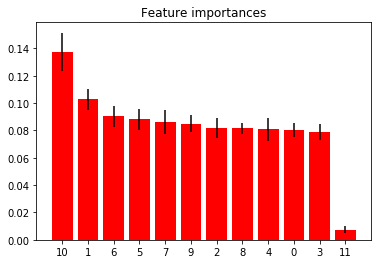

In [307]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=25,
                              random_state=0)

forest.fit(X_train, y_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Donde los números corresponden a los atributos según:  
   0 - fixed acidity  
   1 - volatile acidity  
   2 - citric acid  
   3 - residual sugar  
   4 - chlorides  
   5 - free sulfur dioxide  
   6 - total sulfur dioxide  
   7 - density  
   8 - pH  
   9 - sulphates  
   10 - alcohol  
   11 - tipo  
   
Así, el atributo más relevante es la cantidad de alcohol y el menos relevante es el tipo de vino.  

Finalmente las 3 características más relevantes son: el alcohol, la volatilidad de acidez y el dióxido de sulfuro total.  


#### l) Entrene la máquina de aprendizaje definida en h) sobre las $k$ carecterísticas derivadas del punto anterior ¿Mejora los resultados sobre ésta máquina de aprendizaje?

Creamos los nuevos conjuntos con las 3 caracteristicas más relevantes.

In [308]:
df_red = pd.read_csv("winequality-red.csv",sep=";")
df_white = pd.read_csv("winequality-white.csv",sep=";")

In [309]:
df = pd.concat([df_red,df_white], axis=0)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [311]:
y = df["quality"].values

In [312]:
df.drop("fixed acidity",axis=1,inplace=True)
df.drop("citric acid",axis=1,inplace=True)
df.drop("residual sugar",axis=1,inplace=True)
df.drop("chlorides",axis=1,inplace=True)
df.drop("free sulfur dioxide",axis=1,inplace=True)
df.drop("density",axis=1,inplace=True)
df.drop("pH",axis=1,inplace=True)
df.drop("sulphates",axis=1,inplace=True)
df.drop("quality",axis=1,inplace=True)

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 3 columns):
volatile acidity        6497 non-null float64
total sulfur dioxide    6497 non-null float64
alcohol                 6497 non-null float64
dtypes: float64(3)
memory usage: 203.0 KB


In [314]:
X = df.values

In [315]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [316]:
print("Conjunto de entrenamiento: ", X_train.shape)
print("Conjunto de pruebas: ", X_test.shape)
print("Conjunto de validacion: ", X_val.shape)

Conjunto de entrenamiento:  (3897, 3)
Conjunto de pruebas:  (1300, 3)
Conjunto de validacion:  (1300, 3)


In [317]:
Y_train_codif=[];
Y_test_codif=[];
Y_val_codif=[];
for i in range(3897):
    Y_train_codif.append(int(int(y_train[i])-3));
    if i<1300:
        Y_test_codif.append(int(int(y_test[i])-3));
        Y_val_codif.append(int(int(y_val[i])-3));
Y_train_codif=np.asarray(Y_train_codif);
Y_test_codif=np.asarray(Y_test_codif);
Y_val_codif=np.asarray(Y_val_codif);

In [318]:
import keras
y_onehot_train = keras.utils.to_categorical(Y_train_codif,num_classes=7)
y_onehot_test = keras.utils.to_categorical(Y_test_codif,num_classes=7)
y_onehot_val = keras.utils.to_categorical(Y_val_codif,num_classes=7)

In [319]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)
X_val_scaled = std.transform(X_val)

In [320]:
import time
start_time =time.time()
    
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(y_onehot_train.shape[1], activation="softmax"))
model.compile(optimizer="Adam", loss="categorical_crossentropy")
model.fit(X_train_scaled, y_onehot_train, epochs=40, batch_size=128, verbose=1)

print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/40
3897/3897 [==============================] - 1s 148us/step - loss: 1.4620
Epoch 2/40
3897/3897 [==============================] - 0s 36us/step - loss: 1.1470
Epoch 3/40
3897/3897 [==============================] - 0s 43us/step - loss: 1.1169
Epoch 4/40
3897/3897 [==============================] - 0s 37us/step - loss: 1.1101
Epoch 5/40
3897/3897 [==============================] - 0s 36us/step - loss: 1.0973
Epoch 6/40
3897/3897 [==============================] - 0s 36us/step - loss: 1.0906
Epoch 7/40
3897/3897 [==============================] - 0s 52us/step - loss: 1.0878
Epoch 8/40
3897/3897 [==============================] - 0s 32us/step - loss: 1.0835
Epoch 9/40
3897/3897 [==============================] - 0s 32us/step - loss: 1.0796
Epoch 10/40
3897/3897 [==============================] - 0s 40us/step - loss: 1.0774
Epoch 11/40
3897/3897 [==============================] - 0s 36us/step - loss: 1.0752
Epoch 12/40
3897/3897 [==============================] - 0s 36us/step - l

In [321]:
y_pred_train_nn=model.predict(X_train_scaled);
y_pred_test_nn=model.predict(X_test_scaled);
y_pred_val_nn=model.predict(X_val_scaled);

In [322]:
def f(x):
    if x==0:
        return 3;
    elif x==1:
        return 4;
    elif x==2:
        return 5;
    elif x==3:
        return 6;
    elif x==4:
        return 7;
    elif x==5:
        return 8;
    elif x==6:
        return 9;


y_pred_train_nn_etiquetas=[];
y_pred_test_nn_etiquetas=[];
y_pred_val_nn_etiquetas=[];
for i in range(3897):
    posMax=6;
    valMax=y_pred_train_nn[i][6]
    for j in range(6):
        if y_pred_train_nn[i][j] > valMax:
            valMax=y_pred_train_nn[i][j];
            posMax=j;
    y_pred_train_nn_etiquetas.append(f(posMax));
    if i < 1300:
        posMax=6;
        valMax=y_pred_test_nn[i][6]
        for j in range(6):
            if y_pred_test_nn[i][j] > valMax:
                valMax=y_pred_test_nn[i][j];
                posMax=j;
        y_pred_test_nn_etiquetas.append(f(posMax)); 
        
        posMax=6;
        valMax=y_pred_val_nn[i][6]
        for j in range(6):
            if y_pred_val_nn[i][j] > valMax:
                valMax=y_pred_val_nn[i][j];
                posMax=j;
        y_pred_val_nn_etiquetas.append(f(posMax));   
        
y_pred_train_nn_etiquetas=np.asarray(y_pred_train_nn_etiquetas);
y_pred_test_nn_etiquetas=np.asarray(y_pred_test_nn_etiquetas);
y_pred_val_nn_etiquetas=np.asarray(y_pred_val_nn_etiquetas);

In [323]:
print("Train F1-Score: ",f1_score(y_train,y_pred_train_nn_etiquetas, average='weighted',  labels=np.unique(y_pred_train_nn_etiquetas)))
print("Val F1-Score: ",f1_score(y_val,y_pred_val_nn_etiquetas, average='weighted', labels=np.unique(y_pred_val_nn_etiquetas)))
print("Test F1-Score: ", f1_score(y_test, y_pred_test_nn_etiquetas, average='weighted',labels=np.unique(y_pred_test_nn_etiquetas)))

Train F1-Score:  0.5454346709650523
Val F1-Score:  0.5098393672212922
Test F1-Score:  0.5439024652882032


Notamos una baja en los valores de la metrica F1-score, esto se debe a que el problema no es ni un problema de clasificación ni de regresión en sí, además que las caracteristicas que se consideran son muy pocas para estimar si un vino es bueno o malo, más aún cuantificarlo indicando en que nivel de calidad se encuentran.

<a id="refs"></a>
## Referencias
[1] http://archive.ics.uci.edu/ml/datasets/Wine+Quality  
[2] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
[3] http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html, http://colah.github.io/posts/2014-07-Understanding-Convolutions/    
[4] https://www.vision.ee.ethz.ch/datasets_extra/food-101/  
[5] Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976), *Time Series Analysis, Forecasting and Control*. Third Edition. Holden-Day. Series G.  